<a href="https://colab.research.google.com/github/AbhishekMallaiah001/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

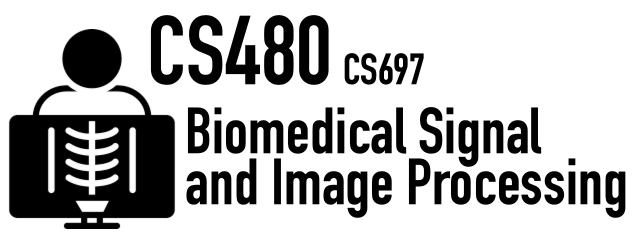
# Assignment 1


In [41]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset  its working 

In [43]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

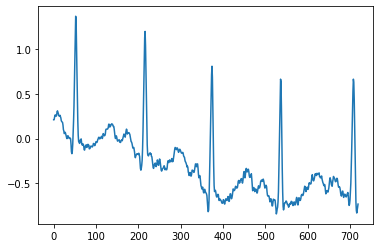

In [44]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

ecg_t = ecg[SAMPLING_RATE*9: SAMPLING_RATE*11]


plt.plot(ecg_t)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [45]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [46]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk
import seaborn as sns


In [48]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [49]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten


[ 125  343  552  748  944 1130 1317 1501 1691 1880]


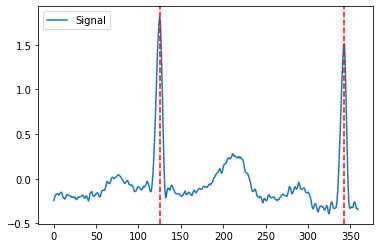

In [50]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [10]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

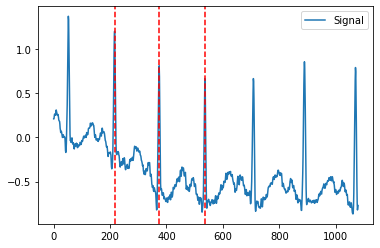

In [51]:
_, rpeaks = nk.ecg_peaks(ecg[9*SAMPLING_RATE:12*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)


plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:3], ecg[9*SAMPLING_RATE:12*SAMPLING_RATE])

**Task 3:** Detect Heartrate. [15 Points]

In [54]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [55]:
#Finding using ecg_process

df, info = nk.ecg_process(ecg, SAMPLING_RATE)

print("Complete HRV analysis")

nk.ecg_intervalrelated(df, sampling_rate=SAMPLING_RATE)



Complete HRV analysis


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,102.348898,108.297224,588.004802,109.298594,108.403694,0.18588,0.184177,569.444444,53.538333,0.094019,75.0,36.738703,62.671906,1177.777778,7.069444,NaN,NaN,0.050629,0.020803,0.003321,2.433775,0.677287,0.278287,-3.872682,76.652987,134.249924,0.570972,32329.054421,1.751398,5.216563,940.500441,0.640472,0.622917,0.886288,0.206107,50.197733,49.954286,50.507949,55.0,0.587461,0.412539,58.751618,49.233709,0.453153,0.546847,90.372528,99.276625,0.486174,0.513826,76.2199,78.357534,1.131386,1.107593


In [56]:
print("heart rate mean :")
print("-------------")
nk.ecg_intervalrelated(df, sampling_rate=SAMPLING_RATE)['ECG_Rate_Mean']

heart rate mean :
-------------


0    102.348898
Name: ECG_Rate_Mean, dtype: float64

Heart rate using R-peaks


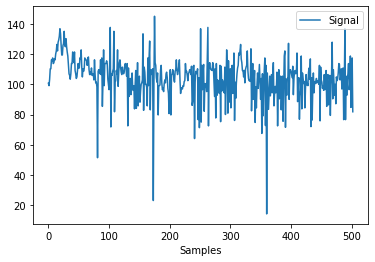

In [58]:
# Finding heart-rate mean using rpeaks.

_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

print("Heart rate using R-peaks")
rate = nk.signal_rate(rpeaks, SAMPLING_RATE, desired_length=None)
fig = nk.signal_plot(rate)
fig 



**Task 4:** Detect P Q S T Peaks. [25 Points]

In [59]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

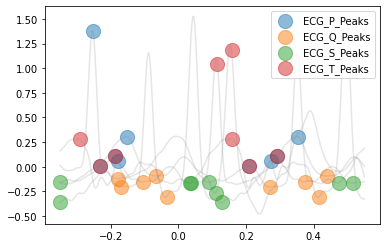

In [60]:
ecg_cleaned = nk.ecg_clean(ecg, SAMPLING_RATE, method="neurokit")

_, rpeaks = nk.ecg_peaks(ecg_cleaned[SAMPLING_RATE*9:SAMPLING_RATE*12], sampling_rate=SAMPLING_RATE)
_, waves_peaks = nk.ecg_delineate(ecg_cleaned, rpeaks, SAMPLING_RATE, show=True, show_type='peaks')




Other formate of representing the P Q S T signals


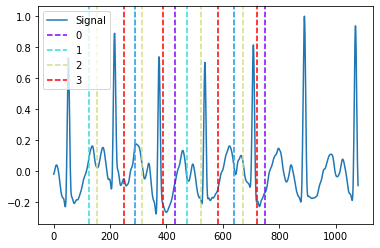

In [62]:
#Other formate of representing the P Q S T signals

# TODO Does the detection work well?
# P Q S T highlighted between 9 to 11 .

ecg_cleaned = nk.ecg_clean(ecg, SAMPLING_RATE, method="neurokit")

_, rpeaks = nk.ecg_peaks(ecg_cleaned[SAMPLING_RATE*9:SAMPLING_RATE*12], sampling_rate=SAMPLING_RATE)
_, waves_peaks = nk.ecg_delineate(ecg_cleaned, rpeaks, SAMPLING_RATE, show=False, show_type='peaks')
print("Other formate of representing the P Q S T signals")

plot = nk.events_plot([waves_peaks['ECG_T_Peaks'][0:4],
                       waves_peaks['ECG_P_Peaks'][0:4],
                       waves_peaks['ECG_Q_Peaks'][0:4],
                       waves_peaks['ECG_S_Peaks'][0:4]], ecg_cleaned[SAMPLING_RATE*9:SAMPLING_RATE*12])

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [20]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

R-peaks and P-Q-S-T peaks before filtering


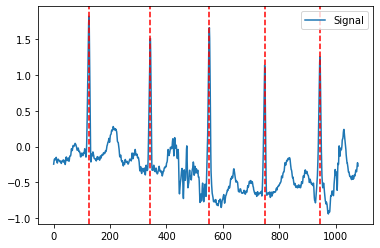

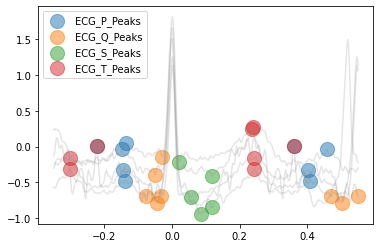

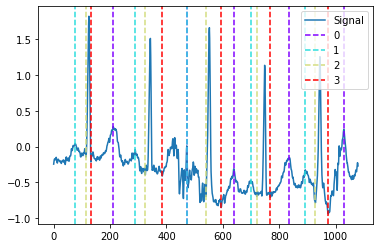

In [63]:
_, rpeaks = nk.ecg_peaks(ecg[SAMPLING_RATE*0:SAMPLING_RATE*3], sampling_rate=SAMPLING_RATE)



print("R-peaks and P-Q-S-T peaks before filtering")
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:5], ecg[0:SAMPLING_RATE*3])

_, waves_peaks = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

plot = nk.events_plot([waves_peaks['ECG_T_Peaks'][0:5],
                       waves_peaks['ECG_P_Peaks'][0:5],
                       waves_peaks['ECG_Q_Peaks'][0:5],
                       waves_peaks['ECG_S_Peaks'][0:5]], ecg[0:SAMPLING_RATE*3])

In [17]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

the R-peaks and P Q S T peaks after filtering


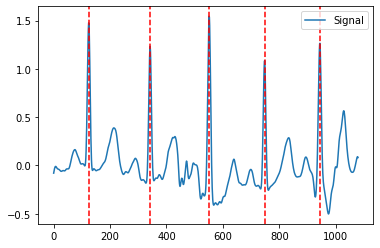

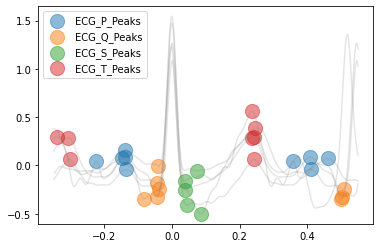

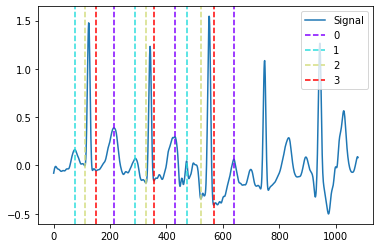

In [68]:


filtered_ecg = nk.signal_filter(ecg, lowcut=1, highcut=60, method='butterworth', order=2)

print ("the R-peaks and P Q S T peaks after filtering")

plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:5], filtered_ecg[0:SAMPLING_RATE*3])

_, waves_peaks = nk.ecg_delineate(filtered_ecg, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')



plot = nk.events_plot([waves_peaks['ECG_T_Peaks'][0:3],
                       waves_peaks['ECG_P_Peaks'][0:3],
                       waves_peaks['ECG_Q_Peaks'][0:3],
                       waves_peaks['ECG_S_Peaks'][0:3]], filtered_ecg[0:SAMPLING_RATE*3])

In [ ]:
# TODO Does the filtering improve the result?

In [132]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#